In [6]:
import os
import numpy as np
from scipy.io import wavfile
from python_speech_features import mfcc
import matplotlib.pyplot as plt
import random

In [7]:
path="C:\\Users\\hp\\audio\\audio"
os.chdir(path)
sub=os.listdir()

In [8]:
sub

['apple', 'banana', 'kiwi', 'lime', 'orange', 'peach', 'pineapple']

In [9]:
data=[]
for i in sub:
    temp=[]
    temp=os.listdir(i)
    data.append(temp)
print(len(data),len(data[0]),data[0][0])

7 15 apple01.wav


<class 'numpy.int16'>


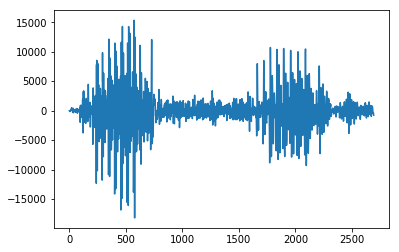

8000 <class 'numpy.ndarray'>


In [16]:
a,b=wavfile.read("C:\\Users\\hp\\audio\\audio\\apple\\apple01.wav")
print(type(b[0]))
plt.plot(b)
plt.show()
print(a,type(b))

In [11]:
files=[]
freqs=[]
for i in range(0,len(data)):
    temp0=np.array([])
    for j in range(0,len(data[i])):
        file=str(path)+"\\"+str(sub[i])+"\\"+str(data[i][j])
        files.append(file)
        x,y=wavfile.read(file)
        freq=mfcc(y,x)
        if(len(temp0)==0):
            temp0=freq
            continue
        temp0=np.append(temp0,freq,axis=0)
    freqs.append(temp0)

In [14]:
freq[0]

array([ 17.81719936, -10.74092646, -22.58503373, -47.04925495,
       -53.47287267,  22.48117611,  -6.65671888,  -1.3685922 ,
         7.56368333,  16.55307928,   0.80242043,   4.0401713 ,
         5.46108873])

In [12]:
freqs[0].shape

(600, 13)

In [44]:
from hmmlearn.hmm import GaussianHMM as Gh

In [45]:
models=[]
def build(data):
    model=Gh(n_components=4,covariance_type="diag",n_iter=1000)
    m1=model.fit(data)
    models.append(m1)

In [46]:
u=int(input("E:"))
for i in range(0,u):
    build(freqs[i])
print("Total models build:",len(models))
for i in range(0,u):
    print(sub[i])

E:7
Total models build: 7
apple
banana
kiwi
lime
orange
peach
pineapple


In [47]:
def score1(model,data):
    s=model.score(data)
    return s
score1(models[0],freq)

-2947.16158089852

In [51]:
def test(data):
    a,b=wavfile.read(data)
    y=mfcc(b,a)
    scp=[]
    for i in range(0,len(models)):
        sc=score1(models[i],y)
        scp.append(sc)
    x=max(scp)
    print(scp)
    for i in range(0,len(scp)):
        if(scp[i]==x):
            print("Original:",data,"\nPridicted:",sub[i])
test(str(path)+"\\"+str(sub[2])+"\\"+str(data[2][0]))

[-2610.0119074206714, -2768.23739661262, -1765.5843562035357, -2741.6718457416105, -2758.3866749803287, -1964.4336085687478, -2426.7634631081223]
Original: C:\Users\hp\audio\audio\kiwi\kiwi01.wav 
Pridicted: kiwi


In [49]:
n=int(input("Enter number of tests:"))
for i in range(0,n):
    j=random.randint(0,6)
    k=random.randint(0,6)
    test(str(path)+"\\"+str(sub[j])+"\\"+str(data[j][k]))

Enter number of tests:5
Original: C:\Users\hp\audio\audio\lime\lime02.wav 
Pridicted: lime
Original: C:\Users\hp\audio\audio\orange\orange02.wav 
Pridicted: orange
Original: C:\Users\hp\audio\audio\lime\lime01.wav 
Pridicted: lime
Original: C:\Users\hp\audio\audio\banana\banana04.wav 
Pridicted: banana
Original: C:\Users\hp\audio\audio\pineapple\pineapple07.wav 
Pridicted: pineapple


In [52]:
test("G:\\platform-tools\\Voice 003.wav")

[-72699.74104168253, -85130.14666312559, -91368.09200906171, -86148.62053531838, -79574.7439134871, -96513.73761543694, -79702.30770910326]
Original: G:\platform-tools\Voice 003.wav 
Pridicted: apple
